image shape = (1144, 1541)


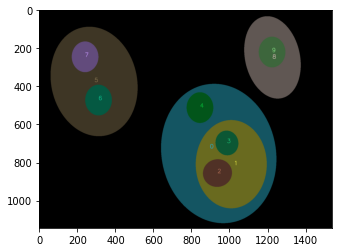

(0)  area=164748.5,                   cent=(898.8, 725.3),                   orientation=1.513,                   b/a=0.754,                   touch=0,                   parent=1,                   children=[1, 2, 3, 4]
(1)  area=105984.0,                   cent=(1025.0, 813.7),                   orientation=-1.551,                   b/a=0.739,                   touch=0,                   parent=2,                   children=[2, 3]
(2)  area=17235.5,                   cent=(938.1, 855.2),                   orientation=1.548,                   b/a=0.862,                   touch=0,                   parent=-1,                   children=[-1]
(3)  area=12100.0,                   cent=(988.1, 697.2),                   orientation=-1.532,                   b/a=0.809,                   touch=0,                   parent=-1,                   children=[-1]
(4)  area=17516.0,                   cent=(846.0, 511.7),                   orientation=-1.571,                   b/a=0.778,               

In [1]:
%matplotlib inline
# python notebook to display blob.py functionality
import numpy as np
import machinevisiontoolbox as mvt

# import sys
# sys.path.append('../')  # TODO temp dirty hack for running files from another folder
# from blob import Blobs

# hope to remove these imports eventually
import matplotlib.pyplot as plt # note: shouldn't have to use these soon
import cv2 as cv  # note: shouldn't have to do these soon


# read in image
im = mvt.iread('../images/multiblobs.png')

# make sure it is grayscale
im = mvt.mono(im)

print('image shape =', im.shape)

# call Blobs class
b = mvt.Blobs(im)

# show blobs
imblobs = b.drawBlobs(im, None, None, None, contourthickness=-1)

# creates a new window, but it doesn't show up in this notebook?
# mvt.idisp(imblobs, title='blobs')
# note: plt.imshow accepts RGB, while imblobs is a BGR 
plt.imshow(imblobs)
plt.show()

# b.printBlobs()
b.printBlobs()

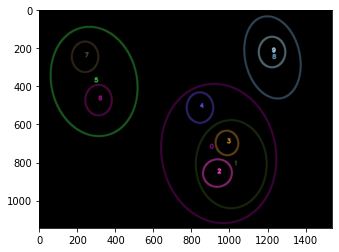

[[[910 387]]

 [[909 388]]

 [[908 388]]

 ...

 [[913 387]]

 [[912 387]]

 [[911 387]]]
(1899, 1, 2)
[910 387]
(1144, 1541)
0


In [2]:

# show blobs as contours:
imcont = b.drawBlobs(im, None,None,None,contourthickness=10, textthickness=5)

plt.imshow(imcont)
plt.show()

ic = 0
ipix = 0
print(b._contours[ic])
print(b._contours[ic].shape)

# pixel coordinates of interest that are 'part' of the contour from findContours
print(b._contours[ic][ipix][0][0:])  

# value of the image at this pixel coordinate:
print(im.shape)

# if 0, then part of the black background, if 1, then actually part of the blob itself
print(im[b._contours[ic][ipix][0][0], b._contours[ic][ipix][0][1]])

# 0, so findContours returns the outside border of blob
# this means that the perimeter will be slightly larger than the true blob's perimeter


In [3]:

# issue: this creates a new window and so the image is not saved inline with the python notebook. 
# additionally, pressing the "X" or close window button crashes the entire python kernel...

# in opencv code:
#cv.imshow('blobby', imblobs) 
#cv.waitKey(0)
#cv.destroyAllWindows()

# using mvt:
mvt.idisp(imblobs)

# potential solution: create an "inline" option for idisp, so that we use matplotlib's imshow instead of opencv's imshow?


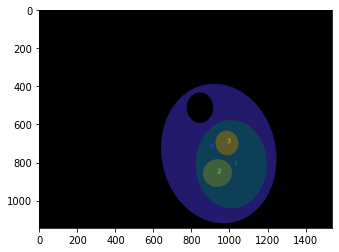

In [4]:
# plot specific contours via specifying the index of the contours, icont

imcont0 = b.drawBlobs(im, None, icont=np.arange(0,4))
plt.imshow(imcont0)
plt.show()

In [5]:
# display area:

print('Blob area')
print(b.area)

print('Blob centroid')
print(b.centroid)




Blob area
[164748.5 105984.   17235.5  12100.   17516.  169904.   17512.5  17524.
  81418.5  17521. ]
Blob centroid
(array([ 898.84604109, 1025.00042459,  938.12879425,  988.07628099,
        846.04635762,  291.73903695,  312.6708827 ,  241.90056494,
       1227.99011691, 1225.20024542]), array([725.32732114, 813.72211843, 855.17236711, 697.2338843 ,
       511.72750628, 377.76350959, 472.14031882, 245.04887583,
       254.28548999, 220.03464414]))


In [6]:

print('number of blobs')
print(len(b))

print('slice of blobs')

b2 = b[0:2]
print('area =', b2.area)

number of blobs
10
slice of blobs
area = [164748.5 105984. ]


Edge case for blobs


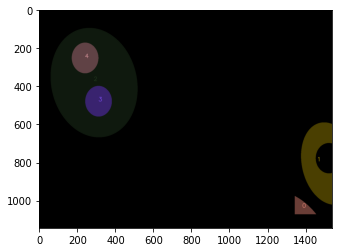

number of blobs =  5
blob area =  [  6113.5  43914.5 187428.   17512.5  17524. ]
blob parent =  [-1 -1  3 -1 -1]


In [8]:

print('Edge case for blobs')

im2 = cv.imread('../images/multiblobs_edgecase.png', cv.IMREAD_GRAYSCALE)
b2 = mvt.Blobs(image=im2)
d2 = b2.drawBlobs(im2, contourthickness=-1)

plt.imshow(d2)
plt.show()

print('number of blobs = ', len(b2))
print('blob area = ', b2.area)
print('blob parent = ', b2._parent)